In [67]:
#Importar las librerias que vamos a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

In [53]:
# Cargar el Dataframe
user_reviews_dfb = pd.read_csv(('C:/Users/CRISTIAN/Desktop/Proyecto final #  1/Proyecto-Final-individual-1-Henry/csv/users_reviews_exportado.csv'))
user_reviews_dfb

,user_id,user_url,reviews,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2...",NaN,2011.0,NaN,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014...",NaN,2014.0,NaN,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',...",NaN,NaN,NaN,248820,No ratings yet,True,A suitably punishing roguelike platformer. Wi...
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2...",NaN,2013.0,NaN,250320,2 of 2 people (100%) found this review helpful,True,This game... is so fun. The fight sequences ha...
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',...",3 people found this review funny,2014.0,NaN,211420,35 of 43 people (81%) found this review helpful,True,Git gud
...,...,...,...,...,...,...,...,...,...,...
25444,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la...",NaN,NaN,NaN,261030,0 of 1 people (0%) found this review helpful,True,I cried in the end its so sadding ]'; I wish l...
25445,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l...",NaN,NaN,NaN,730,0 of 1 people (0%) found this review helpful,True,Gra naprawdę fajna.Ale jest kilka rzeczy do kt...
25446,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',...",1 person found this review funny,NaN,NaN,570,1 of 1 people (100%) found this review helpful,True,Well Done
25447,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l...",NaN,NaN,NaN,233270,No ratings yet,True,this is a very fun and nice 80s themed shooter...


In [54]:
#revisamos la información general
user_reviews_dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25449 entries, 0 to 25448
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      25449 non-null  object 
 1   user_url     25449 non-null  object 
 2   reviews      25449 non-null  object 
 3   funny        4140 non-null   object 
 4   posted       20818 non-null  float64
 5   last_edited  1993 non-null   object 
 6   item_id      25449 non-null  int64  
 7   helpful      25449 non-null  object 
 8   recommend    25449 non-null  bool   
 9   review       25437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 1.8+ MB


In [55]:
#eliminamos las columnas 'funny', y 'last_edited' ya que no me interesa analizar
user_reviews_dfb.drop(columns=['funny', 'last_edited'], inplace=True)

In [56]:
#Estadistica descriptiva de variables numericas
user_reviews_dfb.describe()

,posted,item_id
count,20818.000000,25449.000000
mean,2014.209530,163096.363747
std,0.752509,134640.636400
min,2010.000000,10.000000
25%,2014.000000,4000.000000
50%,2014.000000,212893.000000
75%,2015.000000,259080.000000
max,2015.000000,527340.000000


In [43]:
#Eliminamos valores duplicados en caso de que lleguen a haber
user_reviews_dfb.drop_duplicates(inplace=True)

In [58]:
#Estadistica descriptiva de variables categoricas
columnas_object_reviews = user_reviews_dfb.select_dtypes(include=['object']).columns
df_reviews = user_reviews_dfb[columnas_object_reviews]
df_reviews.describe()

,user_id,user_url,reviews,helpful,review
count,25449,25449,25449,25449,25437
unique,25449,25449,25449,988,24025
top,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2...",No ratings yet,good game
freq,1,1,1,9890,65


In [59]:
#analizamos la cantidad de usuarios unicos
user_reviews_dfb['user_id'].nunique()

25449

In [60]:
#Distribución de recomendaciones hechas
recommend = user_reviews_dfb['recommend'].value_counts()
recommend

recommend
True     22634
False     2815
Name: count, dtype: int64

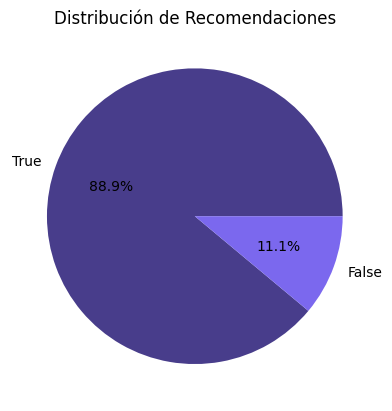

In [61]:
user_reviews_dfb['recommend'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['darkslateblue', 'mediumslateblue'])
plt.title('Distribución de Recomendaciones')
plt.axis('off')
plt.show()

ANALISIS DE SENTIMIENTO

In [66]:
#Convertimos todos los valores de la columna a str
user_reviews_dfb['review'] = user_reviews_dfb['review'].astype(str)


In [68]:
# Crear la columna 'polarity' y pasarle la función que calcula la polaridad del sentimeinto
user_reviews_dfb['polarity'] = user_reviews_dfb['review'].apply(lambda text: TextBlob(text).sentiment.polarity)

In [69]:
#Revisamos las estadísticas de polaridad para definir los intérvalos de categoría de review
user_reviews_dfb["polarity"].describe()

count    25449.000000
mean         0.118120
std          0.294036
min         -1.000000
25%          0.000000
50%          0.062500
75%          0.250000
max          1.000000
Name: polarity, dtype: float64

In [70]:
# Crear la columna 'sentiment' considerando los intérvalos adoptados
user_reviews_dfb['sentiment'] = pd.cut(user_reviews_dfb['polarity'], bins=[-float('inf'), -0.001, 0.0, float('inf')], labels=[0, 1, 2])

In [71]:
# Reviso la distribución del sentimiento para comprobar la segmentación adoptada
user_reviews_dfb["sentiment"].value_counts()

sentiment
2    14489
1     5759
0     5201
Name: count, dtype: int64

tengamos en cuenta que este analisis de sentimiento se indica de la siguiente forma
0 Opiniones negativas, 1 Opiniones neutrales, 2 Opiniones positivas 

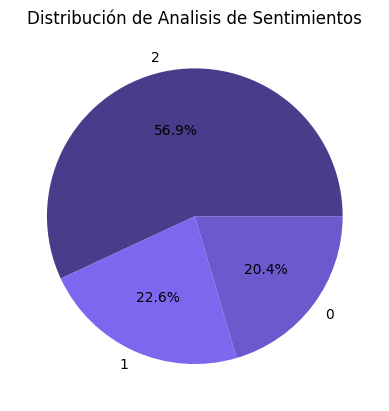

In [72]:
user_reviews_dfb['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['darkslateblue', 'mediumslateblue', 'slateblue'])
plt.title('Distribución de Analisis de Sentimientos')
plt.axis('off')
plt.show()

In [74]:
user_reviews_dfb.to_csv("C:/Users/CRISTIAN/Desktop/Proyecto final #  1/Proyecto-Final-individual-1-Henry/csv/user_reviews_exportado_limpio.csv")